## Pixel year

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import streamlit as st
from streamlit_gsheets import GSheetsConnection
conn = st.connection("gsheets", type=GSheetsConnection)

2024-11-10 13:08:41.441 
  command:

    streamlit run /opt/anaconda3/envs/streamlit_app/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [3]:
data = conn.read(
    worksheet="pixel_year",
    ttl="10m",
    usecols=range(13),
    nrows=31
)
first_col = data.columns[0]
data = data.rename(columns={first_col: 'id_day'})
data = data.set_index('id_day')
data = data.fillna('0')

2024-11-10 13:08:42.986 No runtime found, using MemoryCacheStorageManager
2024-11-10 13:08:42.991 No runtime found, using MemoryCacheStorageManager


In [4]:
data.head()

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,Happy,Happy,Happy,Loved,Happy,Happy,Happy,Happy,Loved,Scared,Confident,0
2,Happy,Happy,Happy,Sad,Happy,Happy,Happy,Confident,Sad,Scared,Happy,0
3,Scared,Sad,Happy,Confident,Happy,Happy,Happy,Happy,Sad,Confident,Confident,0
4,Scared,Sad,Happy,Scared,Happy,Sad,Happy,Happy,Happy,Confident,Happy,0
5,Happy,Scared,Sad,Happy,Playful,Confident,Happy,Happy,Sad,Happy,Happy,0


In [5]:
col_hex = sns.color_palette("Set2", 8).as_hex()
col_hex

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [6]:
for el in col_hex:
    print(el)

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


In [7]:
pixel_val_map = {
    '0': 0,
    'Missing': 1,
    'Happy': 2,
    'Normal': 3, 
    'Relaxed': 4,
    'Sad': 5,
    'Excited': 6
}

pixel_col_map = {
    '0': '#b3b3b3',
    'Missing': '#000000',
    'Happy': '#ffd92f',
    'Normal': '#fc8d62', 
    'Relaxed': '#66c2a5',
    'Sad': '#8da0cb',
    'Excited': '#e78ac3'
}

In [8]:
list(pixel_col_map.values())

['#b3b3b3', '#000000', '#ffd92f', '#fc8d62', '#66c2a5', '#8da0cb', '#e78ac3']

In [9]:
for col in data.columns:
    data[col] = data[col].map(pixel_val_map)

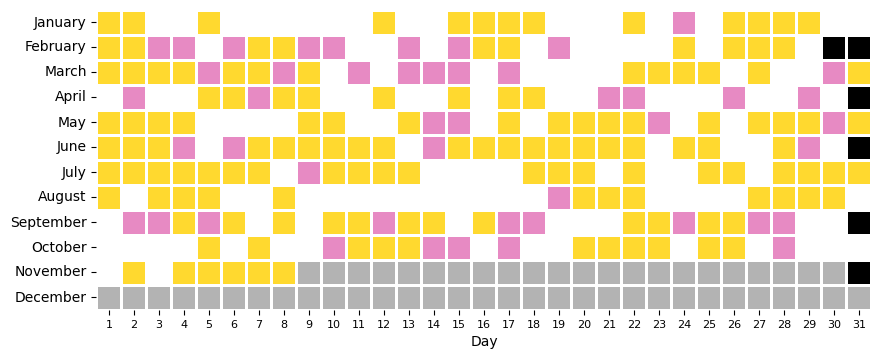

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(
    data.transpose(),
    cmap=list(pixel_col_map.values()),
    cbar=False,
    linewidths=1,
    linecolor='white',
    square=True,
    xticklabels=1,
    ax=ax
)
ax.set_xticklabels(labels=list(data.index), rotation=0, fontsize=8)
ax.set_xlabel('Day')
plt.show()

In [11]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

NameError: name 'uniform_data' is not defined

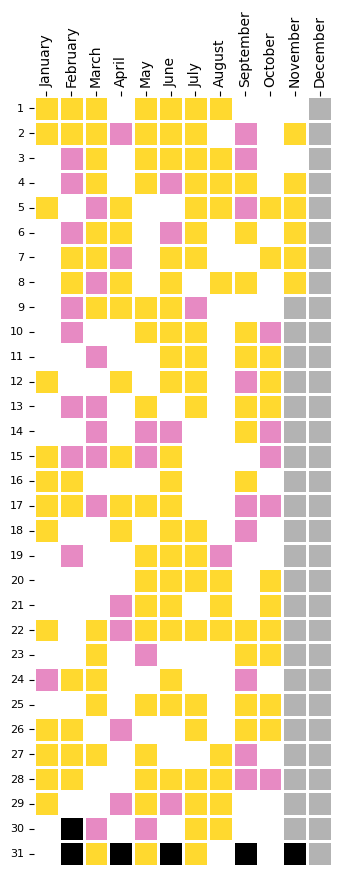

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(
    data,
    cmap=list(pixel_col_map.values()),
    cbar=False,
    linewidths=1,
    linecolor='white',
    square=True,
    xticklabels=1,
    ax=ax
)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xticklabels(labels=list(data.columns), rotation=90, fontsize=10)
ax.set_yticklabels(labels=list(data.index), rotation=0, fontsize=8)
ax.set_ylabel('')
plt.show()

In [13]:
data

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,0
2,2.0,2.0,2.0,5.0,2.0,2.0,2.0,NaN,5.0,NaN,2.0,0
3,NaN,5.0,2.0,NaN,2.0,2.0,2.0,2.0,5.0,NaN,NaN,0
4,NaN,5.0,2.0,NaN,2.0,5.0,2.0,2.0,2.0,NaN,2.0,0
5,2.0,NaN,5.0,2.0,NaN,NaN,2.0,2.0,5.0,2.0,2.0,0
6,NaN,5.0,2.0,2.0,NaN,5.0,2.0,NaN,2.0,NaN,2.0,0
7,NaN,2.0,2.0,5.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,0
8,NaN,2.0,5.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,2.0,0
9,NaN,5.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,0.0,0
